In [1]:
from robust_motifs.data import load_sparse_matrix_from_pkl
import numpy as np

In [2]:
from pathlib import Path
import pickle

In [3]:
import matplotlib.pyplot as plt

In [4]:
def average_correlations(gids, gid_start, gid_end, corr_matrix, conn_matrix):
    dvalues = []
    bvalues = []
    dvariances = []
    bvariances = []
    values = []
    variances = []
    btot = []
    dtot = []
    tot = []
    edges = np.hstack([np.expand_dims(elem, axis = 1) for elem in np.nonzero(conn_matrix)])
    posarray = np.empty((gid_end - gid_start + 1,))
    posarray[:] = np.nan
    for j, element in enumerate(gids - gid_start):
        posarray[element] = j

    dcorrelations = np.empty((edges.shape[0],))
    dcorrelations[:] = np.nan
    bcorrelations = np.empty((edges.shape[0],))
    bcorrelations[:] = np.nan
    correlations = np.empty((edges.shape[0],))
    correlations[:] = np.nan
    extra_count = 0
    for j, (row, col) in enumerate(edges):
        if np.isnan(posarray[row]) or np.isnan(posarray[col]):
            value = 0
        else:
            value = corr_matrix[int(posarray[row])][int(posarray[col])]
        if conn_matrix[col, row]:
            bcorrelations[j] = value
        else:
            dcorrelations[j] = value
        correlations[j] = value
    return np.nanmean(bcorrelations), np.nanmean(correlations)

### First seed

In [5]:
p = Path("data/activity/spikes/evoked/seed181842")

In [6]:
gids = pickle.load(open(p / "gids.pkl", 'rb'))
matrix = load_sparse_matrix_from_pkl(Path("data/activity/network/cons_locs_pathways_mc2_Column/cons_locs_pathways_mc2_Column.pkl"))
matrix = np.array(matrix.todense())
corr_matrix = pickle.load(open(p/"pearson_correlation.pkl", 'rb'))

In [7]:
bcorrelation, correlation = average_correlations(gids, 62693, 94038, corr_matrix, matrix)

In [8]:
a = pickle.load(open(p / "simplexwise_pc_all.pkl", 'rb'))
b = pickle.load(open(p / "simplexwise_pc_spine.pkl", 'rb'))
c = pickle.load(open(p / "simplexwise_pc_end.pkl", 'rb'))

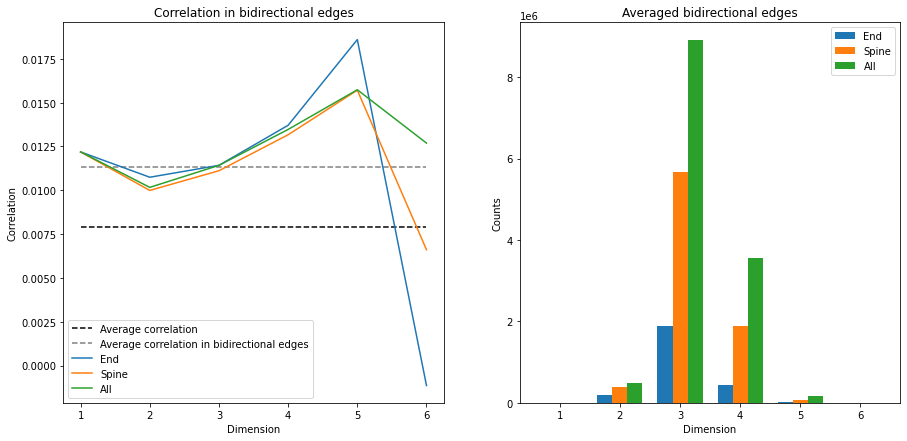

In [9]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'End')
axes[0].errorbar(range(1,7), b[0][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[0][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in bidirectional edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[0][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[0][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[0][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged bidirectional edges")
axes[1].legend()

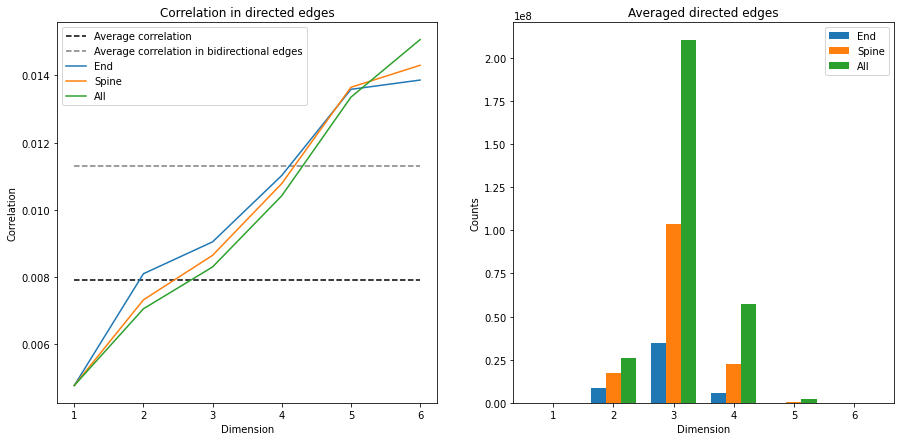

In [10]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[1][0], label = 'End')
axes[0].errorbar(range(1,7), b[1][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[1][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in directed edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[1][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[1][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[1][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged directed edges")
axes[1].legend()

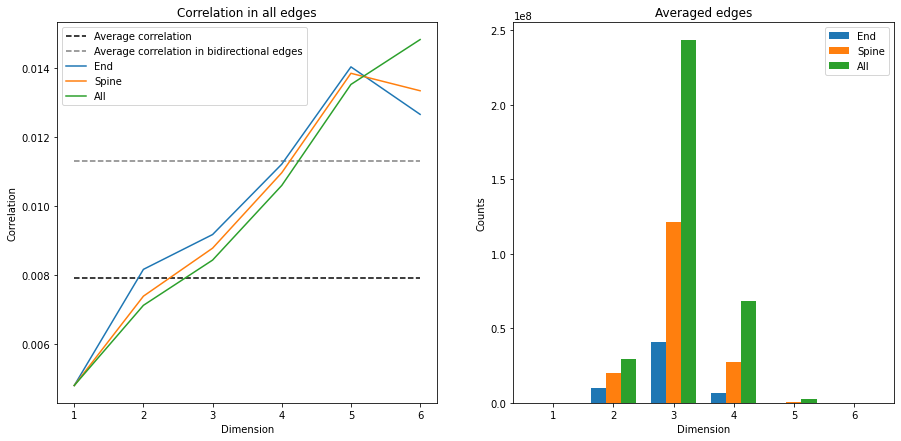

In [11]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[2][0], label = 'End')
axes[0].errorbar(range(1,7), b[2][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[1].legend()

Text(0.5, 1.0, 'Averaged edges')

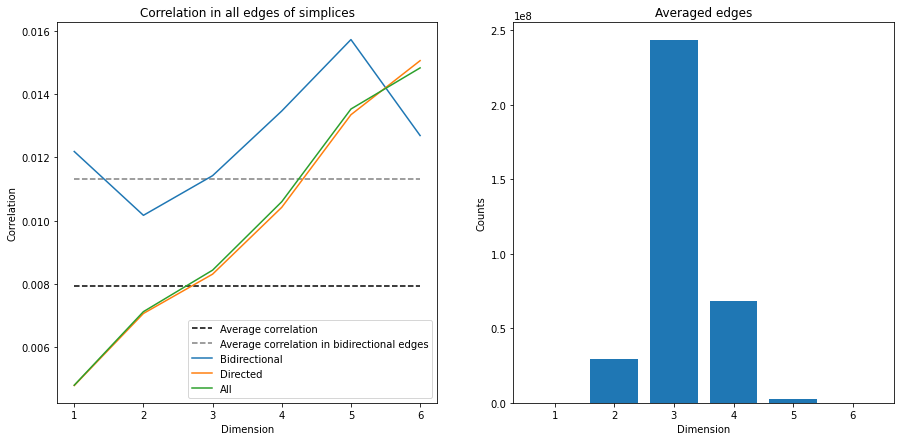

In [12]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), a[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), a[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), a[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

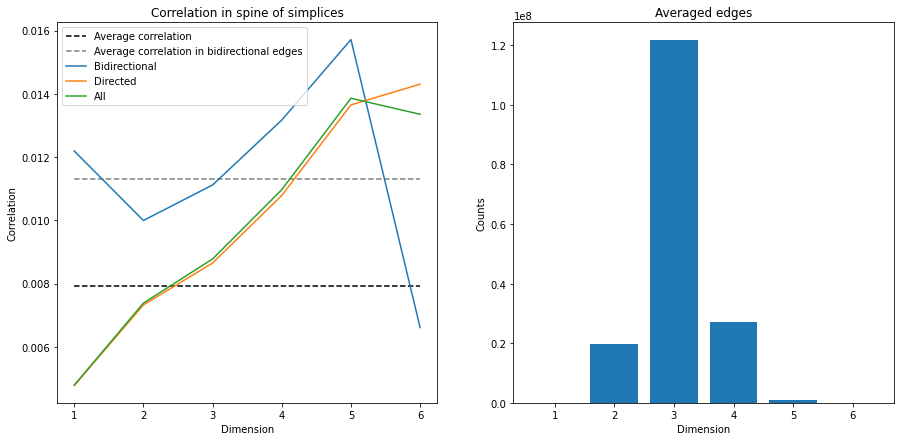

In [13]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), b[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), b[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), b[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in spine of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), b[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

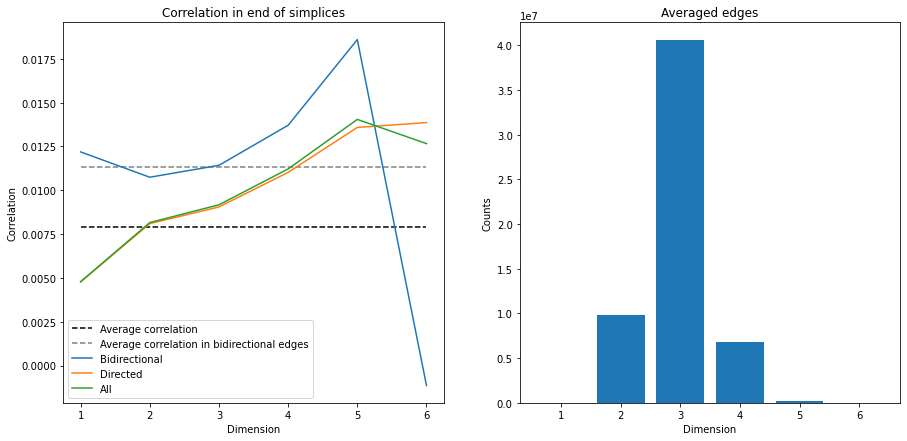

In [14]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), c[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), c[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in end of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), c[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

### Second seed

In [15]:
p = Path("data/activity/spikes/evoked/seed25888/")

In [16]:
gids = pickle.load(open(p / "gids.pkl", 'rb'))
matrix = load_sparse_matrix_from_pkl(Path("data/activity/network/cons_locs_pathways_mc2_Column/cons_locs_pathways_mc2_Column.pkl"))
matrix = np.array(matrix.todense())
corr_matrix = pickle.load(open(p/"pearson_correlation.pkl", 'rb'))

In [17]:
bcorrelation, correlation = average_correlations(gids, 62693, 94038, corr_matrix, matrix)

In [18]:
a = pickle.load(open(p / "simplexwise_pc_all.pkl", 'rb'))
b = pickle.load(open(p / "simplexwise_pc_spine.pkl", 'rb'))
c = pickle.load(open(p / "simplexwise_pc_end.pkl", 'rb'))

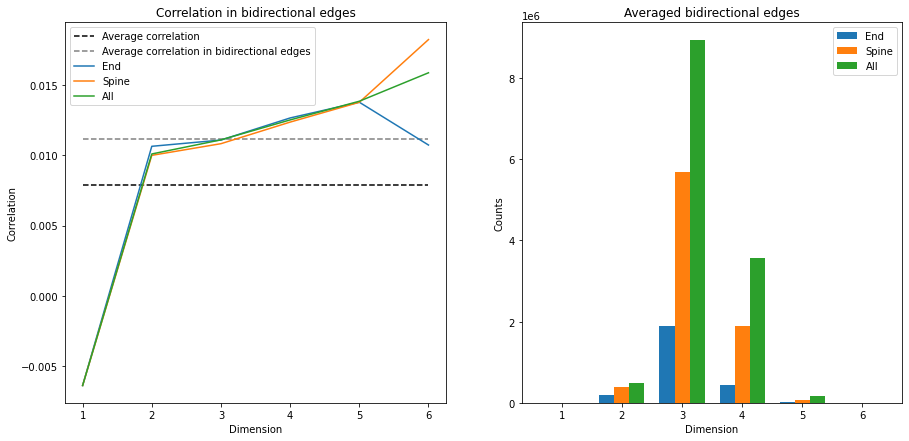

In [19]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'End')
axes[0].errorbar(range(1,7), b[0][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[0][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in bidirectional edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[0][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[0][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[0][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged bidirectional edges")
axes[1].legend()

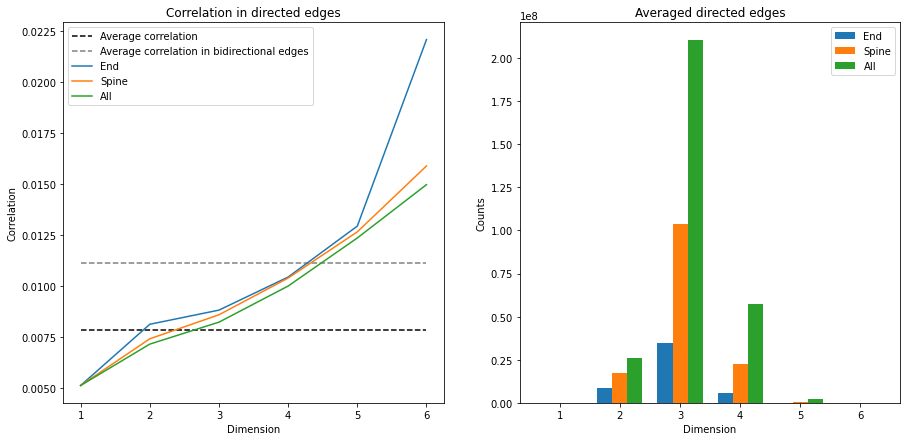

In [20]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[1][0], label = 'End')
axes[0].errorbar(range(1,7), b[1][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[1][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in directed edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[1][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[1][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[1][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged directed edges")
axes[1].legend()

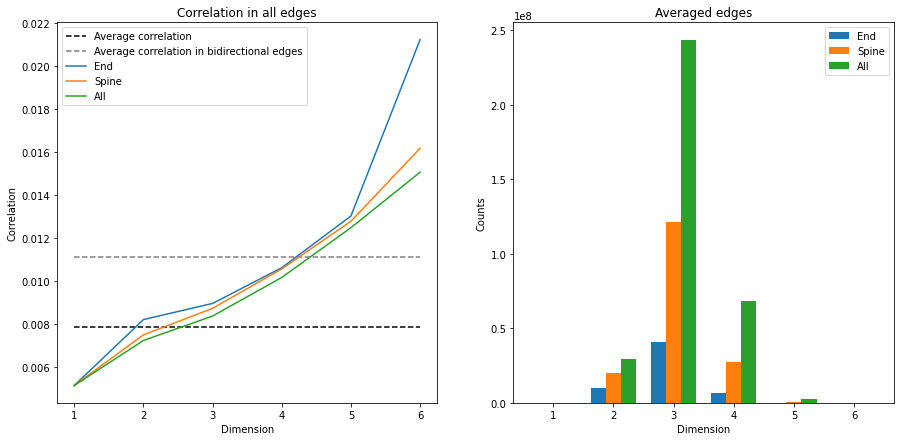

In [21]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[2][0], label = 'End')
axes[0].errorbar(range(1,7), b[2][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[1].legend()

Text(0.5, 1.0, 'Averaged edges')

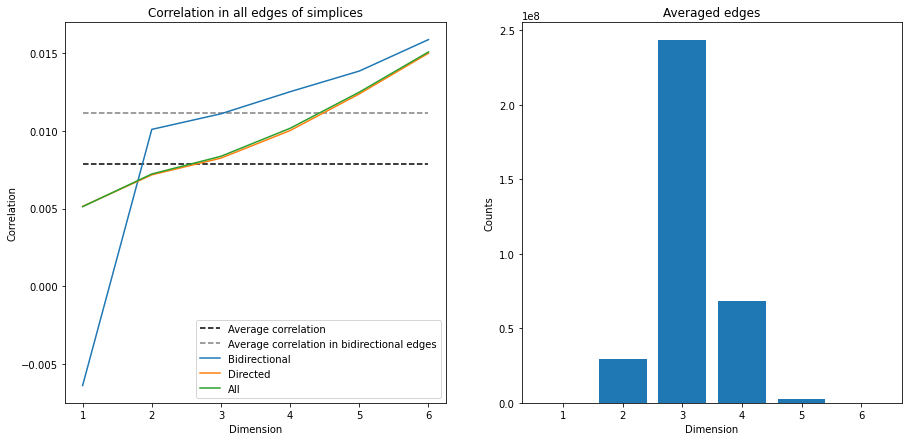

In [22]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), a[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), a[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), a[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

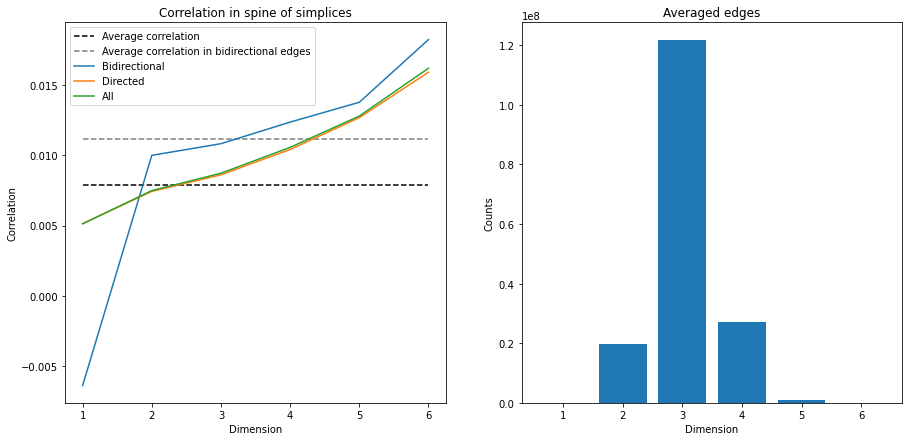

In [23]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), b[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), b[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), b[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in spine of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), b[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

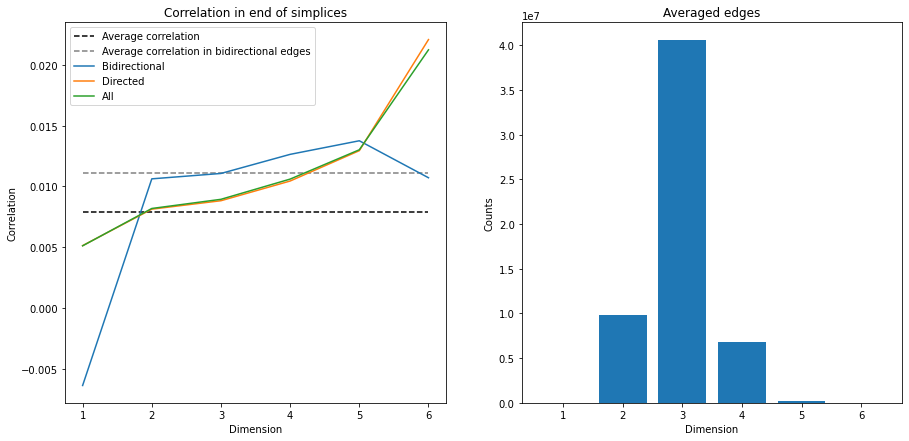

In [24]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), c[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), c[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in end of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), c[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

### Third seed

In [25]:
p = Path("data/activity/spikes/evoked/seed282267/")

In [26]:
gids = pickle.load(open(p / "gids.pkl", 'rb'))
matrix = load_sparse_matrix_from_pkl(Path("data/activity/network/cons_locs_pathways_mc2_Column/cons_locs_pathways_mc2_Column.pkl"))
matrix = np.array(matrix.todense())
corr_matrix = pickle.load(open(p/"pearson_correlation.pkl", 'rb'))

In [27]:
bcorrelation, correlation = average_correlations(gids, 62693, 94038, corr_matrix, matrix)

In [28]:
a = pickle.load(open(p / "simplexwise_pc_all.pkl", 'rb'))
b = pickle.load(open(p / "simplexwise_pc_spine.pkl", 'rb'))
c = pickle.load(open(p / "simplexwise_pc_end.pkl", 'rb'))

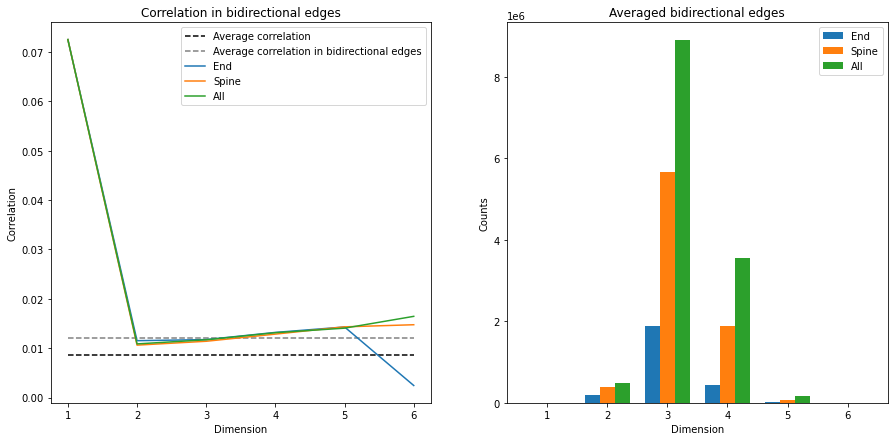

In [29]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'End')
axes[0].errorbar(range(1,7), b[0][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[0][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in bidirectional edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[0][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[0][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[0][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged bidirectional edges")
axes[1].legend()

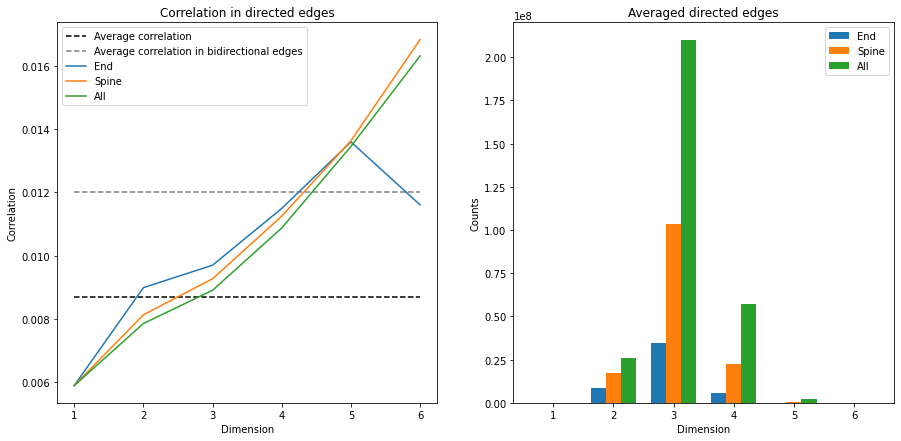

In [30]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[1][0], label = 'End')
axes[0].errorbar(range(1,7), b[1][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[1][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in directed edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[1][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[1][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[1][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged directed edges")
axes[1].legend()

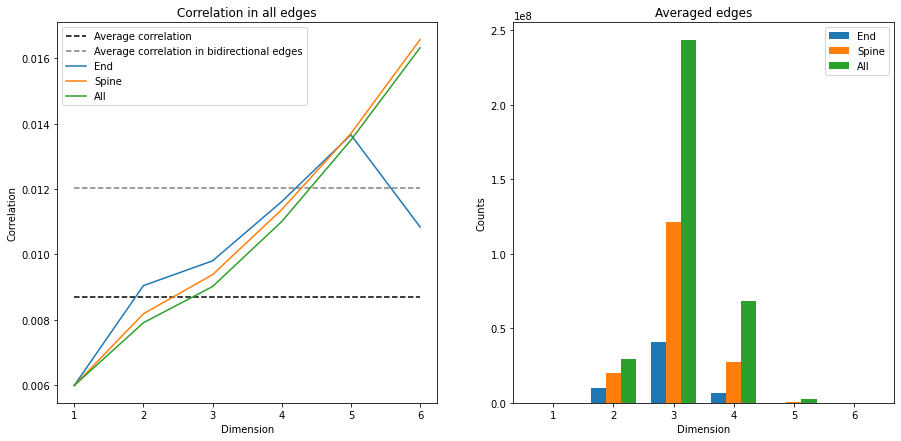

In [31]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[2][0], label = 'End')
axes[0].errorbar(range(1,7), b[2][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[1].legend()

Text(0.5, 1.0, 'Averaged edges')

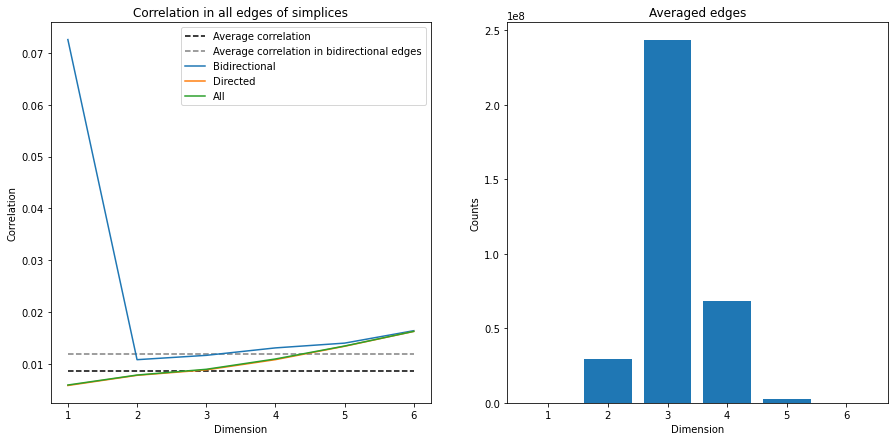

In [32]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), a[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), a[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), a[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

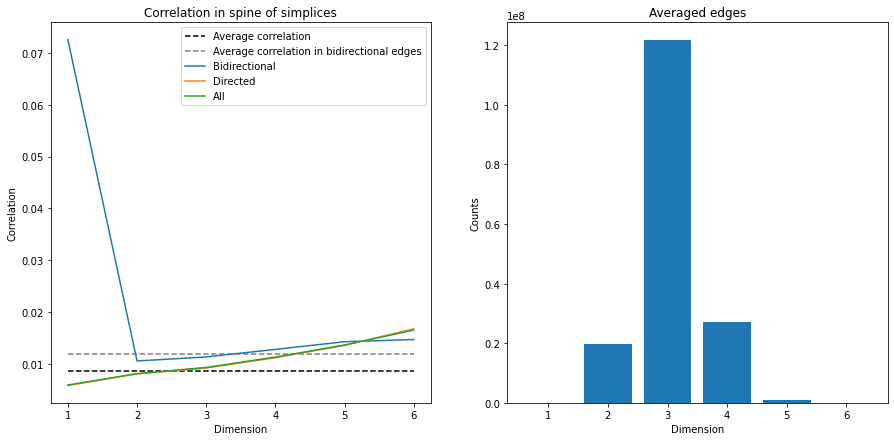

In [33]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), b[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), b[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), b[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in spine of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), b[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

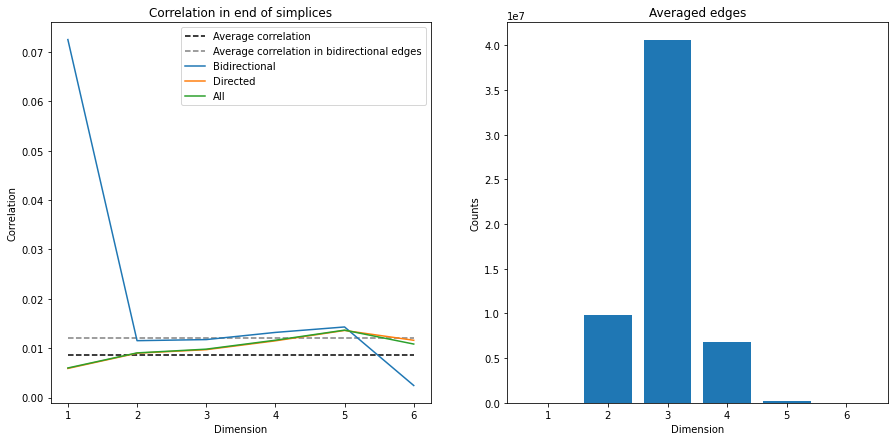

In [34]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), c[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), c[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in end of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), c[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

### Spont seed 1

In [35]:
p = Path("data/activity/spikes/spont/seed134276/")

In [36]:
gids = pickle.load(open(p / "gids.pkl", 'rb'))
matrix = load_sparse_matrix_from_pkl(Path("data/activity/network/cons_locs_pathways_mc2_Column/cons_locs_pathways_mc2_Column.pkl"))
matrix = np.array(matrix.todense())
corr_matrix = pickle.load(open(p/"pearson_correlation.pkl", 'rb'))

In [37]:
bcorrelation, correlation = average_correlations(gids, 62693, 94038, corr_matrix, matrix)

In [38]:
a = pickle.load(open(p / "simplexwise_pc_all.pkl", 'rb'))
b = pickle.load(open(p / "simplexwise_pc_spine.pkl", 'rb'))
c = pickle.load(open(p / "simplexwise_pc_end.pkl", 'rb'))

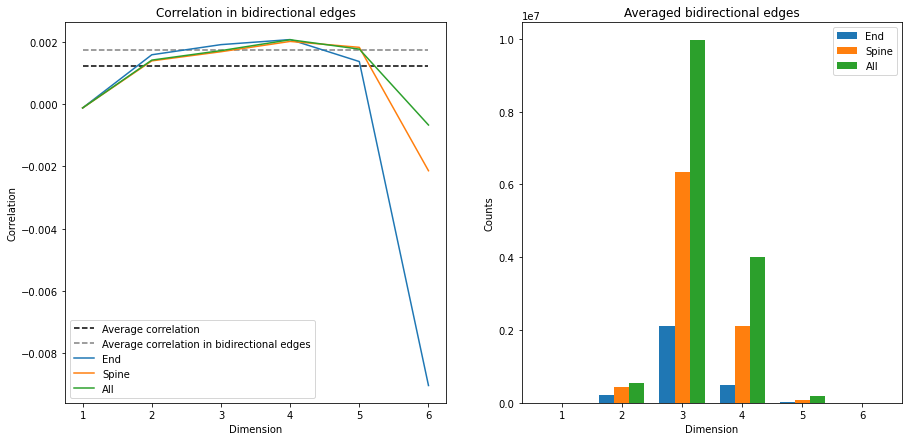

In [39]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'End')
axes[0].errorbar(range(1,7), b[0][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[0][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in bidirectional edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[0][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[0][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[0][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged bidirectional edges")
axes[1].legend()

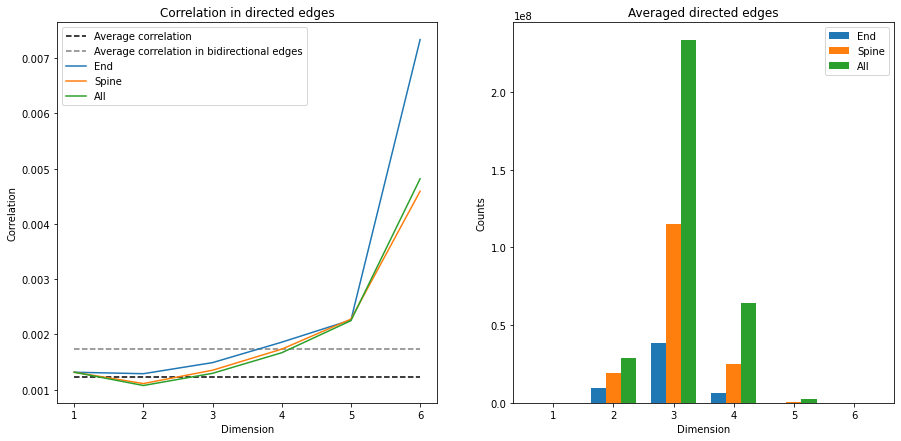

In [40]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[1][0], label = 'End')
axes[0].errorbar(range(1,7), b[1][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[1][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in directed edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[1][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[1][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[1][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged directed edges")
axes[1].legend()

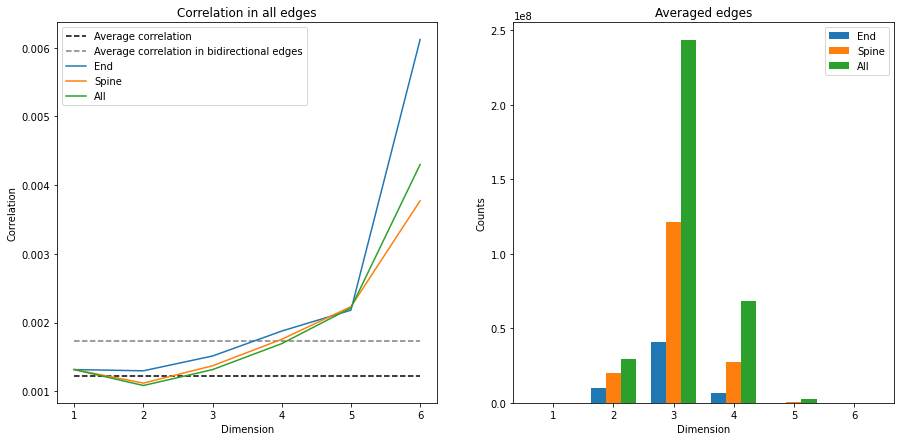

In [41]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[2][0], label = 'End')
axes[0].errorbar(range(1,7), b[2][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[1].legend()

Text(0.5, 1.0, 'Averaged edges')

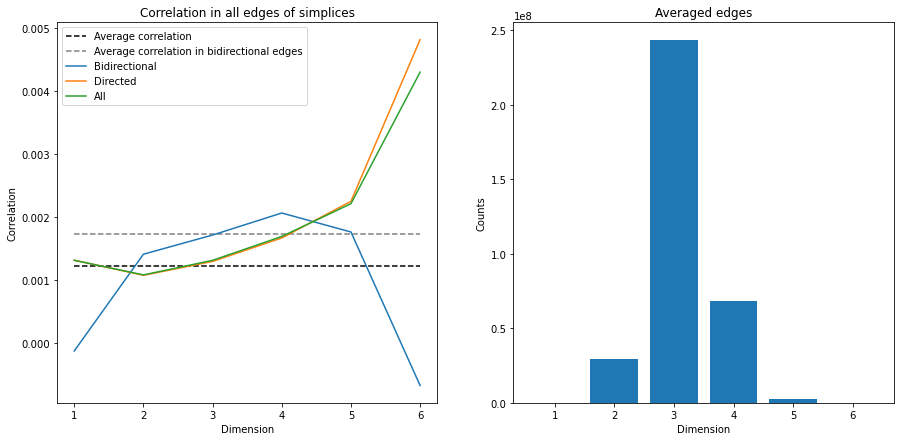

In [42]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), a[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), a[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), a[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

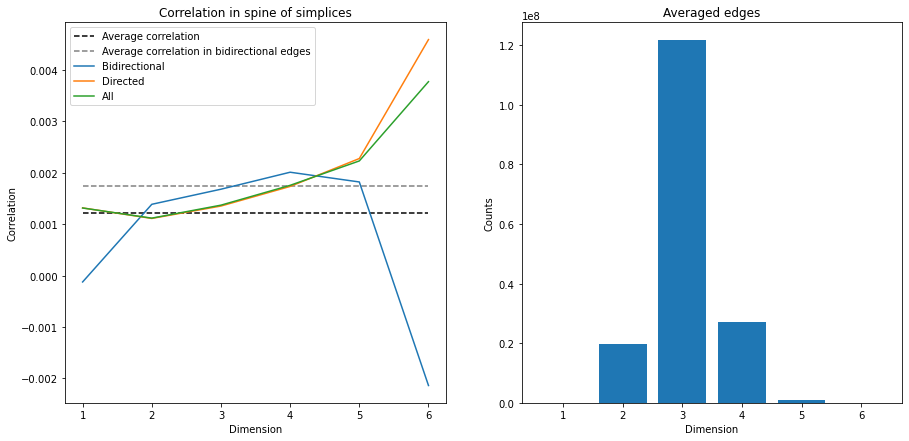

In [43]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), b[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), b[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), b[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in spine of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), b[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

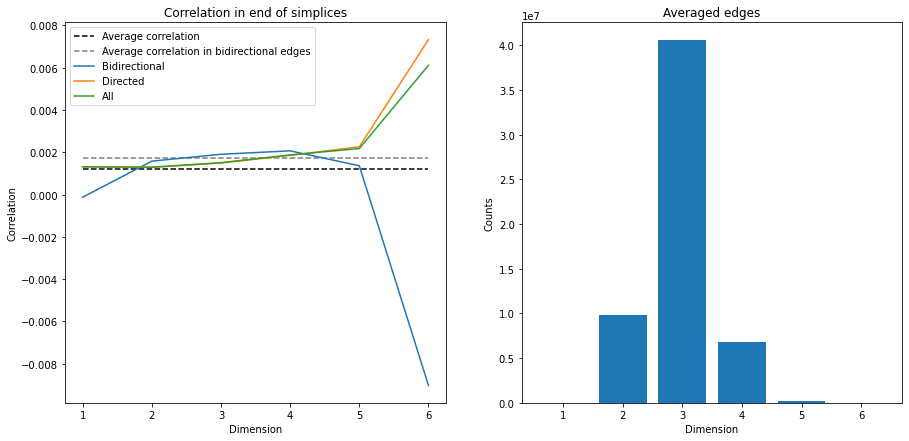

In [44]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), c[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), c[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in end of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), c[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

### Spont seed 2

In [45]:
p = Path("data/activity/spikes/spont/seed38290//")

In [46]:
gids = pickle.load(open(p / "gids.pkl", 'rb'))
matrix = load_sparse_matrix_from_pkl(Path("data/activity/network/cons_locs_pathways_mc2_Column/cons_locs_pathways_mc2_Column.pkl"))
matrix = np.array(matrix.todense())
corr_matrix = pickle.load(open(p/"pearson_correlation.pkl", 'rb'))

In [47]:
bcorrelation, correlation = average_correlations(gids, 62693, 94038, corr_matrix, matrix)

In [48]:
a = pickle.load(open(p / "simplexwise_pc_all.pkl", 'rb'))
b = pickle.load(open(p / "simplexwise_pc_spine.pkl", 'rb'))
c = pickle.load(open(p / "simplexwise_pc_end.pkl", 'rb'))

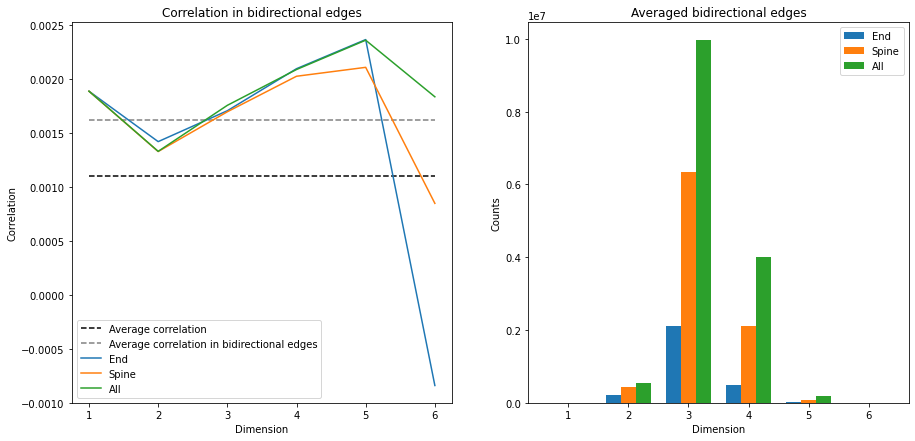

In [49]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'End')
axes[0].errorbar(range(1,7), b[0][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[0][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in bidirectional edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[0][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[0][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[0][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged bidirectional edges")
axes[1].legend()

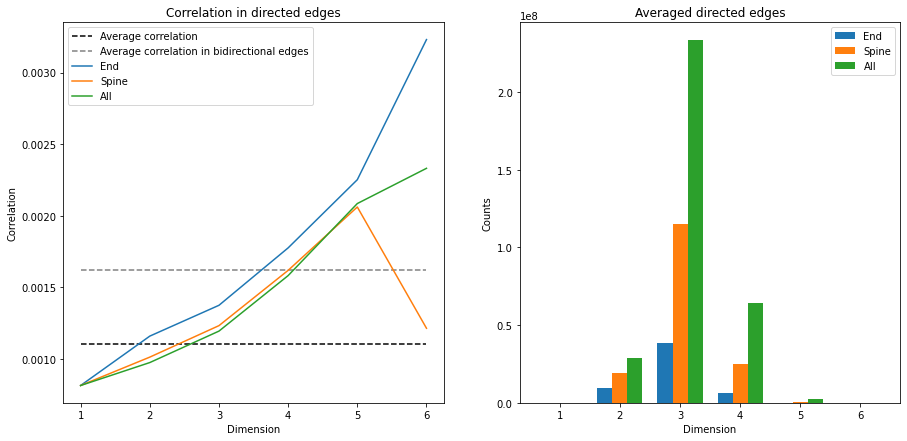

In [50]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[1][0], label = 'End')
axes[0].errorbar(range(1,7), b[1][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[1][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in directed edges")
axes[0].legend()

width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[1][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[1][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[1][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged directed edges")
axes[1].legend()

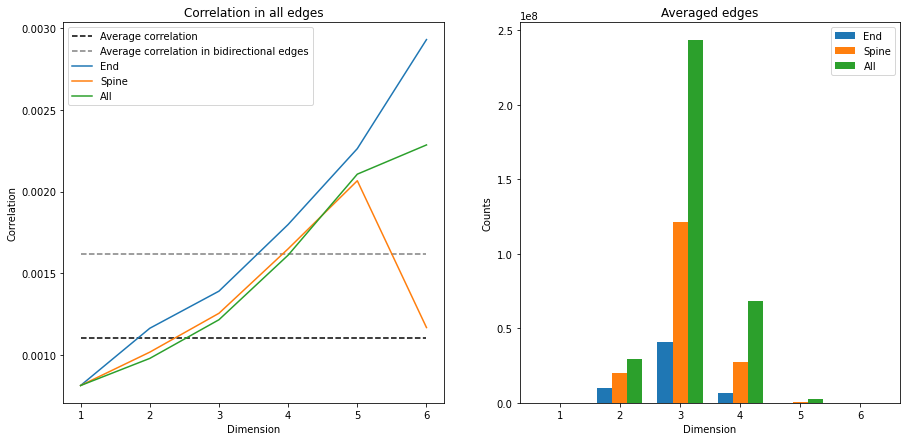

In [51]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[2][0], label = 'End')
axes[0].errorbar(range(1,7), b[2][0], label = 'Spine')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[1].legend()

Text(0.5, 1.0, 'Averaged edges')

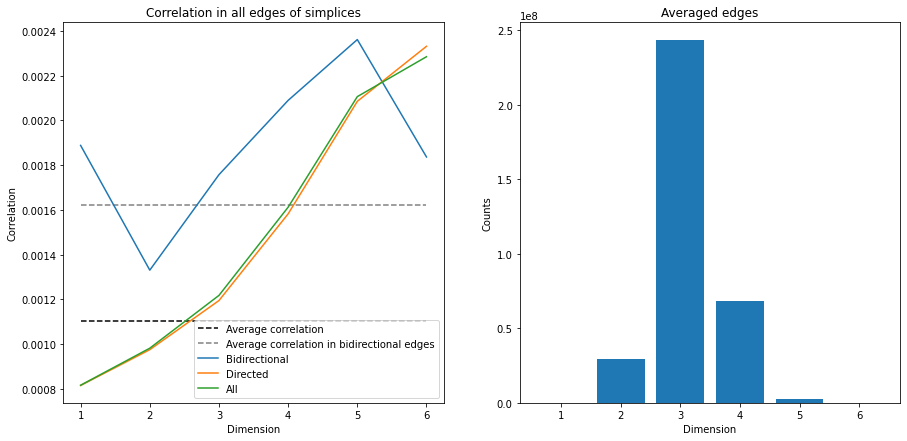

In [52]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), a[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), a[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), a[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), a[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

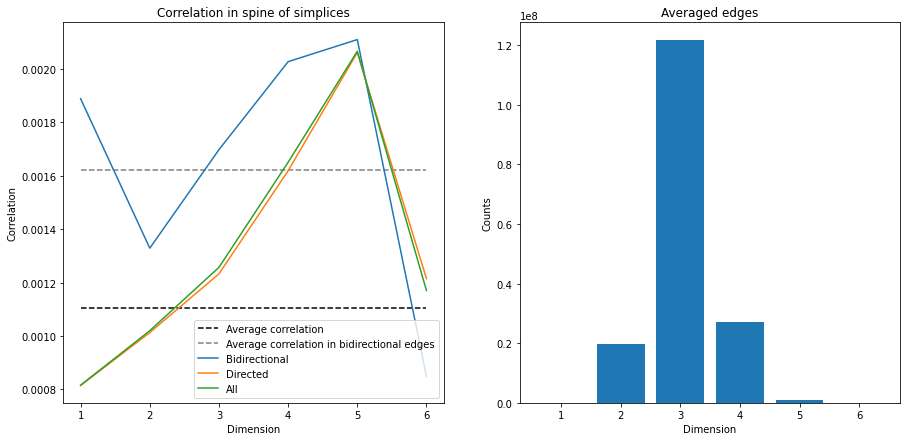

In [53]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), b[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), b[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), b[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in spine of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), b[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

Text(0.5, 1.0, 'Averaged edges')

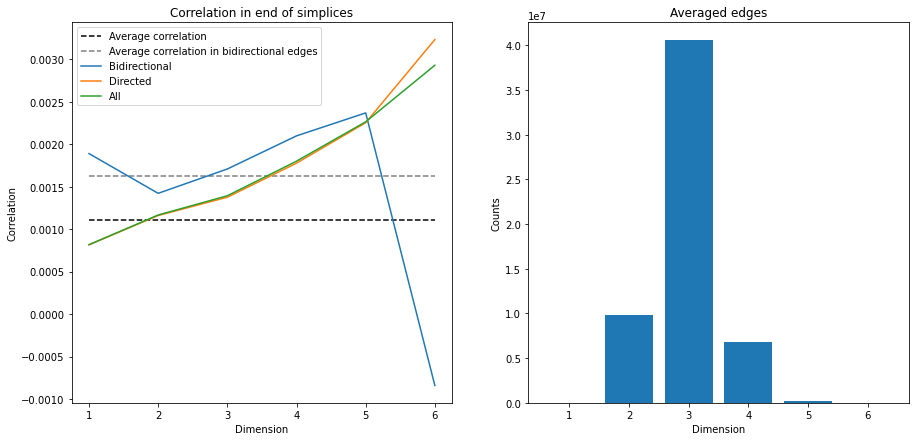

In [54]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), c[0][0], label = 'Bidirectional')
axes[0].errorbar(range(1,7), c[1][0], label = 'Directed')
axes[0].errorbar(range(1,7), c[2][0], label = 'All')
axes[0].hlines(correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(bcorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in end of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), c[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")

# All

### Evoked

In [55]:
abid = np.zeros((6,), dtype = float)
adir = np.zeros((6,), dtype = float)
aall = np.zeros((6,), dtype = float)

bbid = np.zeros((6,), dtype = float)
bdir = np.zeros((6,), dtype = float)
ball = np.zeros((6,), dtype = float)

cbid = np.zeros((6,), dtype = float)
cdir = np.zeros((6,), dtype = float)
call = np.zeros((6,), dtype = float)

correlations = []
bcorrelations = []

matrix = load_sparse_matrix_from_pkl(Path("data/activity/network/cons_locs_pathways_mc2_Column/cons_locs_pathways_mc2_Column.pkl"))
matrix = np.array(matrix.todense())

for seed in Path("data/activity/spikes/evoked").glob("*"):
    a = pickle.load(open(seed / "simplexwise_pc_all.pkl", 'rb'))
    abid += a[0][0]
    adir += a[1][0]
    aall += a[2][0]
    b = pickle.load(open(seed / "simplexwise_pc_spine.pkl", 'rb'))
    bbid += b[0][0]
    bdir += b[1][0]
    ball += b[2][0]
    c = pickle.load(open(seed / "simplexwise_pc_end.pkl", 'rb'))
    cbid += c[0][0]
    cdir += c[1][0]
    call += c[2][0]
    
    gids = pickle.load(open(seed / "gids.pkl", 'rb'))
    corr_matrix = pickle.load(open(seed/"pearson_correlation.pkl", 'rb'))
    bcorrelation, correlation = average_correlations(gids, 62693, 94038, corr_matrix, matrix)
    correlations.append(correlation)
    bcorrelations.append(bcorrelation)
abid/=20
adir/=20
aall/=20
bbid/=20
bdir/=20
ball/=20
cbid/=20
cdir/=20
call/=20

average_correlation = np.mean(correlations)
average_bicorrelation = np.mean(bcorrelations)

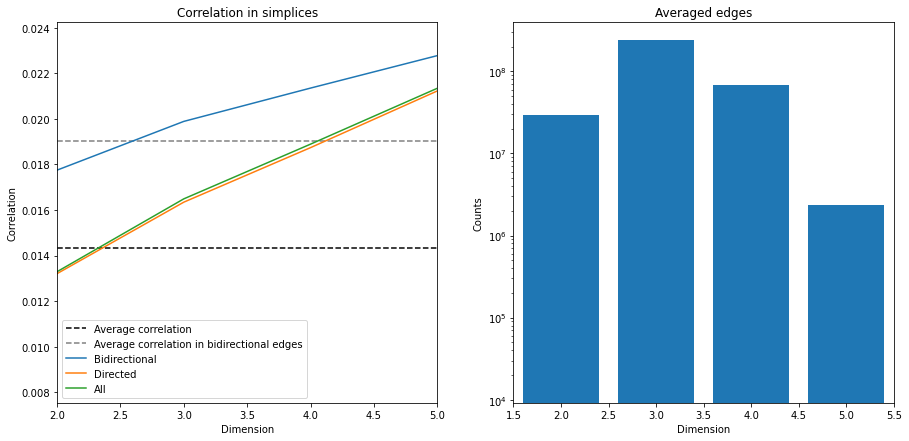

In [56]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), abid, label = 'Bidirectional')
axes[0].errorbar(range(1,7), adir, label = 'Directed')
axes[0].errorbar(range(1,7), aall, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), a[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
fig.savefig("type_all_evoked", facecolor = 'white')

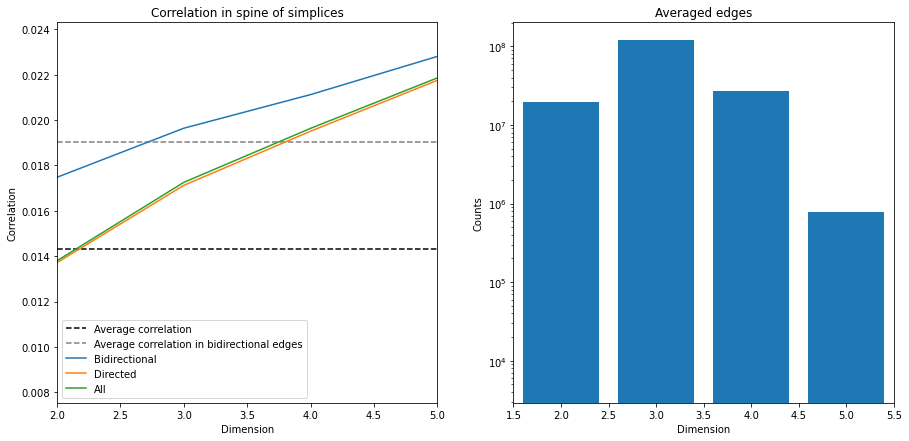

In [57]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), bbid, label = 'Bidirectional')
axes[0].errorbar(range(1,7), bdir, label = 'Directed')
axes[0].errorbar(range(1,7), ball, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in spine of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), b[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
fig.savefig("type_spine_evoked", facecolor = 'white')

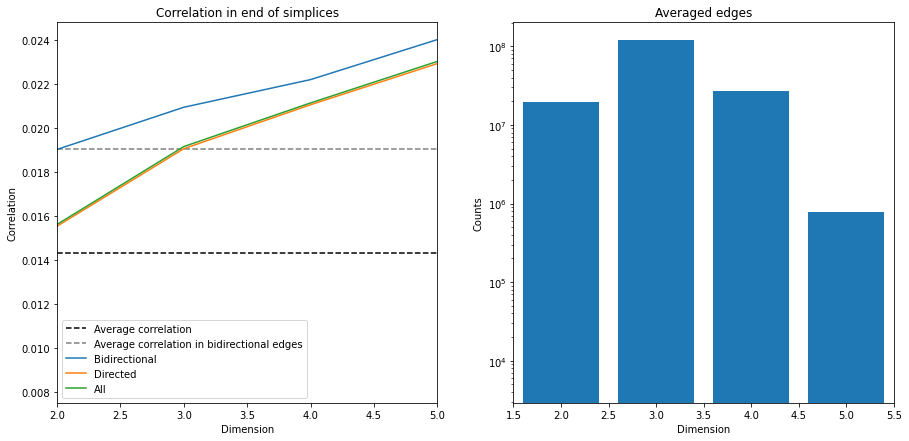

In [58]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), cbid, label = 'Bidirectional')
axes[0].errorbar(range(1,7), cdir, label = 'Directed')
axes[0].errorbar(range(1,7), call, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in end of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), b[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
fig.savefig("type_end_evoked", facecolor = 'white')

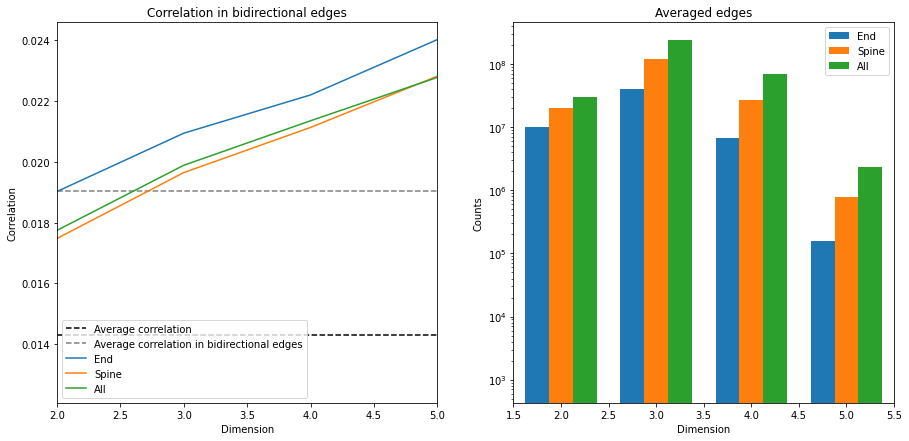

In [59]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), cbid, label = 'End')
axes[0].errorbar(range(1,7), bbid, label = 'Spine')
axes[0].errorbar(range(1,7), abid, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in bidirectional edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
axes[1].legend()
fig.savefig("position_bid_evoked", facecolor = 'white')

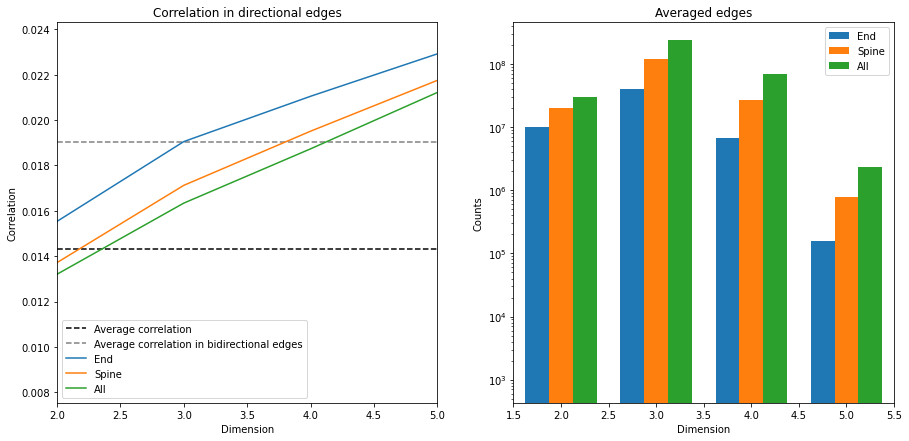

In [60]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), cdir, label = 'End')
axes[0].errorbar(range(1,7), bdir, label = 'Spine')
axes[0].errorbar(range(1,7), adir, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in directional edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
axes[1].legend()
fig.savefig("position_dir_evoked", facecolor = 'white')

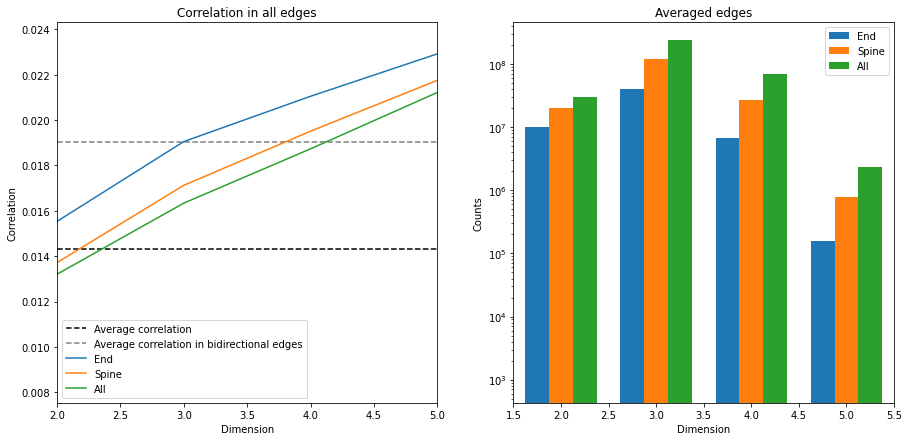

In [61]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), cdir, label = 'End')
axes[0].errorbar(range(1,7), bdir, label = 'Spine')
axes[0].errorbar(range(1,7), adir, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
axes[1].legend()
fig.savefig("position_all_evoked", facecolor = 'white')

### Spontaneous

In [62]:
abid = np.zeros((6,), dtype = float)
adir = np.zeros((6,), dtype = float)
aall = np.zeros((6,), dtype = float)

bbid = np.zeros((6,), dtype = float)
bdir = np.zeros((6,), dtype = float)
ball = np.zeros((6,), dtype = float)

cbid = np.zeros((6,), dtype = float)
cdir = np.zeros((6,), dtype = float)
call = np.zeros((6,), dtype = float)

correlations = []
bcorrelations = []

matrix = load_sparse_matrix_from_pkl(Path("data/activity/network/cons_locs_pathways_mc2_Column/cons_locs_pathways_mc2_Column.pkl"))
matrix = np.array(matrix.todense())

for seed in Path("data/activity/spikes/spont").glob("*"):
    a = pickle.load(open(seed / "simplexwise_pc_all.pkl", 'rb'))
    abid += a[0][0]
    adir += a[1][0]
    aall += a[2][0]
    b = pickle.load(open(seed / "simplexwise_pc_spine.pkl", 'rb'))
    bbid += b[0][0]
    bdir += b[1][0]
    ball += b[2][0]
    c = pickle.load(open(seed / "simplexwise_pc_end.pkl", 'rb'))
    cbid += c[0][0]
    cdir += c[1][0]
    call += c[2][0]
    
    gids = pickle.load(open(seed / "gids.pkl", 'rb'))
    corr_matrix = pickle.load(open(seed/"pearson_correlation.pkl", 'rb'))
    bcorrelation, correlation = average_correlations(gids, 62693, 94038, corr_matrix, matrix)
    correlations.append(correlation)
    bcorrelations.append(bcorrelation)

abid/=3
adir/=3
aall/=3
bbid/=3
bdir/=3
ball/=3
cbid/=3
cdir/=3
call/=3


average_correlation = np.mean(correlations)
average_bicorrelation = np.mean(bcorrelations)

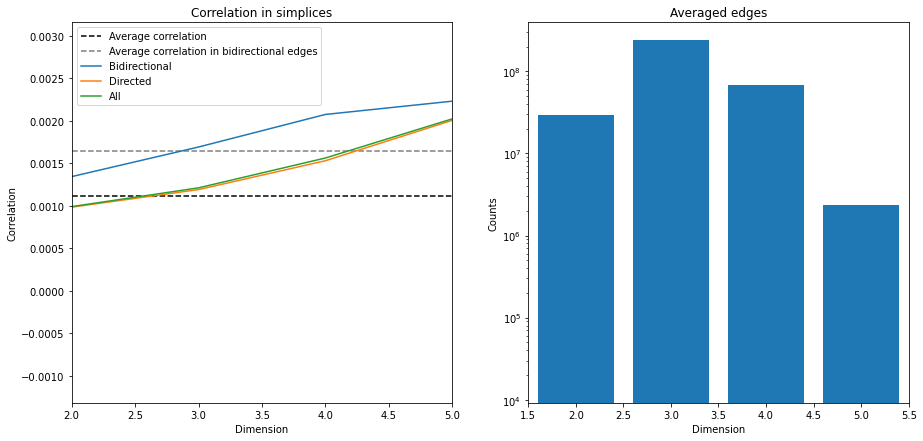

In [63]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), abid, label = 'Bidirectional')
axes[0].errorbar(range(1,7), adir, label = 'Directed')
axes[0].errorbar(range(1,7), aall, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), a[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
fig.savefig("type_all_spont", facecolor = 'white')

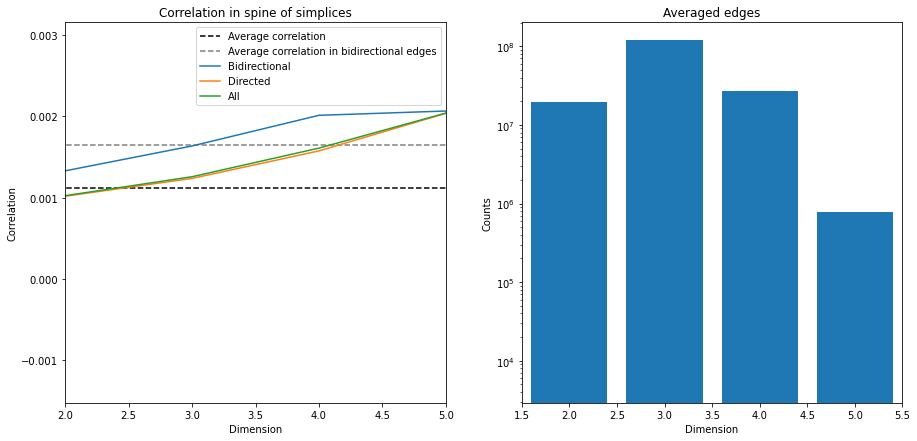

In [64]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), bbid, label = 'Bidirectional')
axes[0].errorbar(range(1,7), bdir, label = 'Directed')
axes[0].errorbar(range(1,7), ball, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in spine of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), b[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
fig.savefig("type_spine_spont", facecolor = 'white')

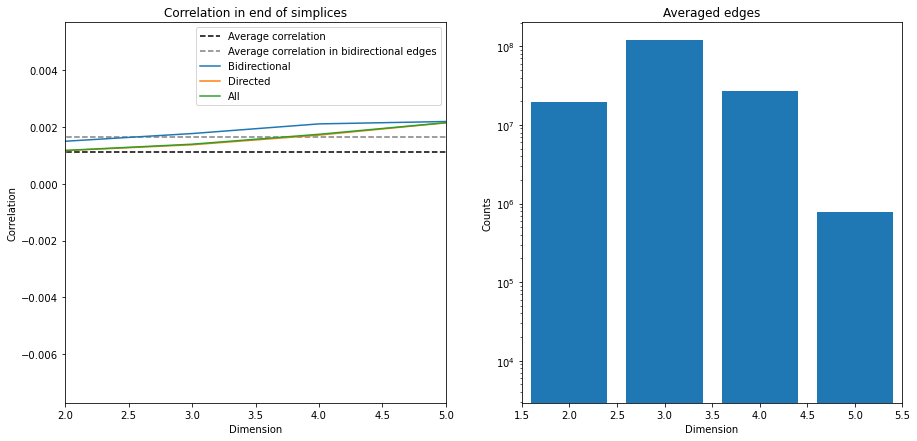

In [65]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), cbid, label = 'Bidirectional')
axes[0].errorbar(range(1,7), cdir, label = 'Directed')
axes[0].errorbar(range(1,7), call, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in end of simplices")
axes[0].legend()

axes[1].bar(np.arange(1,7), b[2][2])
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
fig.savefig("type_end_spont", facecolor = 'white')

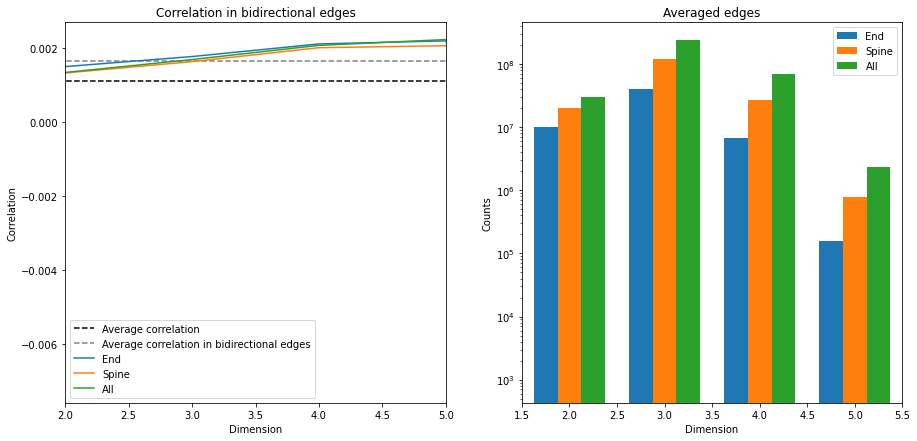

In [66]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), cbid, label = 'End')
axes[0].errorbar(range(1,7), bbid, label = 'Spine')
axes[0].errorbar(range(1,7), abid, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in bidirectional edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
axes[1].legend()
fig.savefig("position_bid_spont", facecolor = 'white')

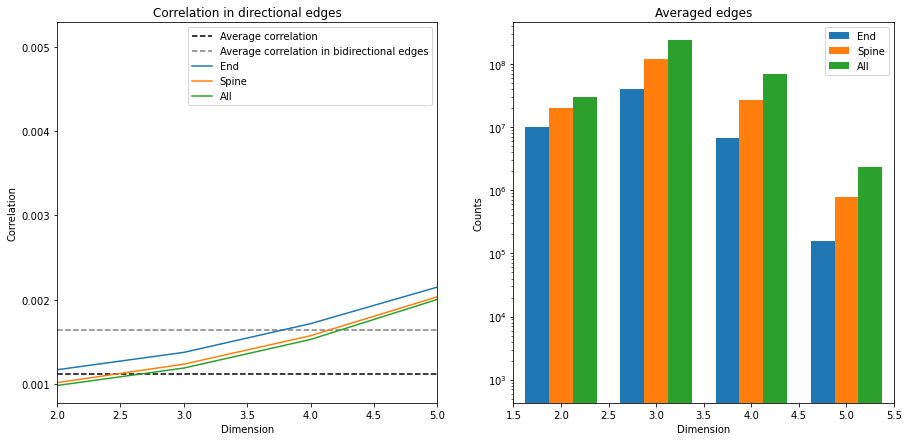

In [67]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), cdir, label = 'End')
axes[0].errorbar(range(1,7), bdir, label = 'Spine')
axes[0].errorbar(range(1,7), adir, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in directional edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
axes[1].legend()
fig.savefig("position_dir_spont", facecolor = 'white')

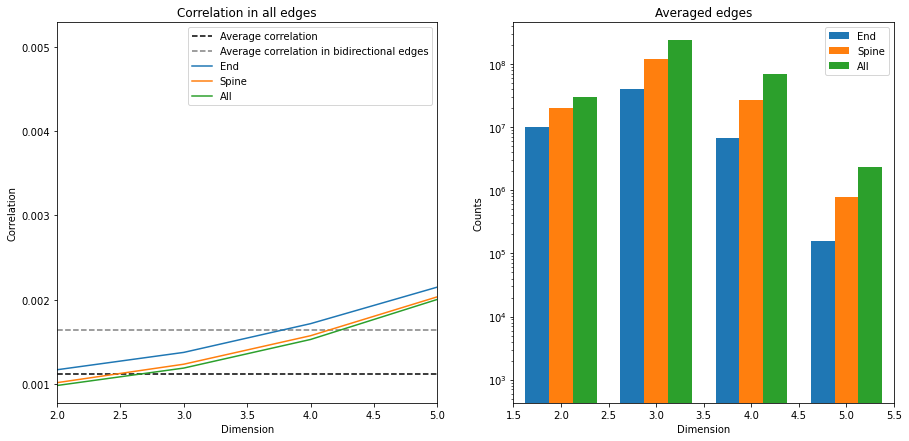

In [68]:
fig, axes = plt.subplots(1,2, figsize = [15, 7])
axes[0].errorbar(range(1,7), cdir, label = 'End')
axes[0].errorbar(range(1,7), bdir, label = 'Spine')
axes[0].errorbar(range(1,7), adir, label = 'All')
axes[0].hlines(average_correlation, xmin = 1, xmax = 6, colors = "black", label = "Average correlation", linestyles = 'dashed')
axes[0].hlines(average_bicorrelation, xmin = 1, xmax = 6, colors = "gray", label = "Average correlation in bidirectional edges", linestyles = 'dashed')
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Correlation")
axes[0].set_title("Correlation in all edges")
axes[0].legend()


width = 1/4
axes[1].bar(np.arange(1,7)-1/4, c[2][2], width = width, label = 'End')
axes[1].bar(np.arange(1,7), b[2][2], width = width, label = 'Spine')
axes[1].bar(np.arange(1,7)+1/4, a[2][2], width = width, label = 'All')
axes[1].set_xlabel("Dimension")
axes[1].set_ylabel("Counts")
axes[1].set_title("Averaged edges")
axes[0].set_xlim([2,5])
axes[1].set_xlim([1.5,5.5])
axes[1].set_yscale('log')
axes[1].legend()
fig.savefig("position_all_spont", facecolor = 'white')